### What is Machine Leanrning?
- Machine Learning is an application of artifical intelligence. It mainly focus on the designing of systems, there by allowing them to learn and make prediction based on some experience which is data in case of machine.

In [39]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import seaborn as sns

### Steps involving in solving a problem with Machine Learning Techniques
- Data Processing
- Define Error
- Split the data
- Train Model
- Prediction

# Data Processing

In [40]:
iris = load_iris()

In [41]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [42]:
features = pd.DataFrame(iris.data, columns=iris.feature_names)

In [43]:
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
target = pd.DataFrame(iris.target,columns=['Target'])

In [45]:
target

,Target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [46]:
df = pd.concat([features,target],axis=1)

In [48]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [49]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Correlation between Target and Attributes

Correlation is a statistical techniques that can show whether and how strongly pairs of variables are related

In [101]:
c = df.corr()

In [102]:
c

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Target,0.782561,-0.426658,0.949035,0.956547,1.000000


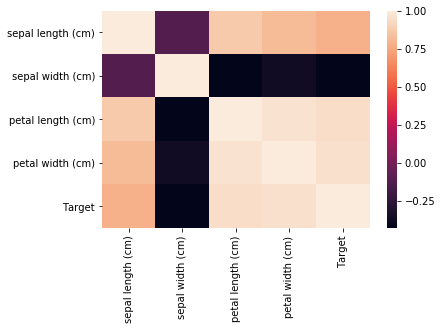

In [103]:
sns.heatmap(corr)

### Normalize the data
- Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1.
- It is also knowns as MinMaxScaling.

In [105]:
X = df['petal length (cm)'].values
Y = df['Target'].values

In [106]:
# Before Normalization
print(X[:5])

[1.4 1.4 1.3 1.5 1.4]


In [107]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1,1))
X = X[:,-1]

In [91]:
y_scaler =MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1,1))
Y = Y[:,-1]

In [108]:
# after normalization
print(X[:5])

[0.06779661 0.06779661 0.05084746 0.08474576 0.06779661]


### Spliting Data:
- Split the data into training and testing data.

In [110]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

#### Train Model

### Linear Regression:
- In Statistics, linear regression is a linear approach to modeling the relationship between dependent variable and independent variable.
- $ Y = m * X + c $

In [111]:
Model = LinearRegression()

In [113]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [115]:
Model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
Model.coef_

array([[2.58604436]])

In [119]:
Model.intercept_

array([-0.21040565])

### Plotting the Regression line upon the training dataset

#### Scatter plot:
-A graph of plotted points that show the relationship between two sets of data.

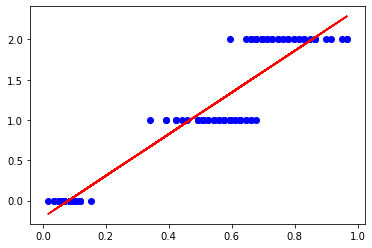

In [121]:
plt.scatter(x_train,y_train, color='b')
plt.plot(x_train,Model.intercept_+ Model.coef_ * x_train, color='r')

### Prediction

In [123]:
prediction = Model.predict(x_test)

In [125]:
prediction = prediction[:,-1]

In [126]:
prediction

array([ 1.45518225,  2.37563871,  1.01686964,  0.00875065, -0.07891187,
        1.2798572 ,  0.18407569,  1.76200107,  0.00875065,  1.98115737,
        1.14836342,  1.80583233,  1.58667603,  1.41135099, -0.03508061,
        1.80583233,  1.58667603,  1.36751972,  1.84966359,  0.09641317,
        0.05258191,  1.80583233, -0.21040565,  0.00875065,  1.19219468,
        0.05258191, -0.03508061,  1.89349485,  1.80583233,  1.58667603])

## Plot the predicted values against the target values

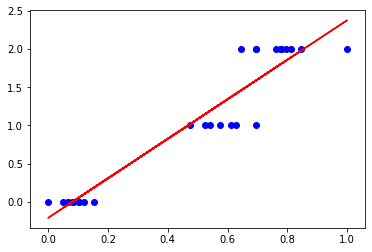

In [128]:
plt.scatter(x_test,y_test,color ='b')
plt.plot(x_test, prediction, color='r')

In [129]:
Result = pd.DataFrame(list(zip(x_test,y_test,prediction)),columns=['X','Target_Y','Prediction_y'])

In [131]:
Result.head()

,X,Target_Y,Prediction_y
0,[0.6440677966101694],[2],1.455182
1,[1.0],[2],2.375639
2,[0.47457627118644063],[1],1.016870
3,[0.0847457627118644],[0],0.008751
4,[0.05084745762711865],[0],-0.078912


In [132]:
print("MAE",metrics.mean_absolute_error(y_test,prediction))

MAE 0.19372244310683323


In [133]:
print("MSE",metrics.mean_squared_error(y_test,prediction))

MSE 0.06364244997405769


In [134]:
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

RMSE 0.2522745527675308
